In [3]:
import pandas as pd 

df =pd.read_csv('data/tree/adult_dataset.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [20]:
#cleaning data

df= df[ ~((df['workclass']=='?') |( df['occupation']=='?'))  ]

df.shape

(30718, 15)

In [21]:
from sklearn import  preprocessing

df_categories = df.select_dtypes(include=['object'])

df_categories

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K
5,Private,HS-grad,Divorced,Other-service,Unmarried,White,Female,United-States,<=50K
6,Private,10th,Separated,Adm-clerical,Unmarried,White,Male,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,United-States,<=50K
32557,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32558,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32559,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K


In [22]:
#encoding set for column 

le =preprocessing.LabelEncoder()
df_categories= df_categories.apply(le.fit_transform)
df_categories.head()


,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,2,11,6,3,1,4,0,39,0
3,2,5,0,6,4,4,0,39,0
4,2,15,5,9,3,4,0,39,0
5,2,11,0,7,4,4,0,39,0
6,2,0,5,0,4,4,1,39,0


In [26]:
df= df.drop(df_categories.columns, axis=1)
df=pd.concat([df,df_categories] , axis=1)
df.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,82,132870,9,0,4356,18,2,11,6,3,1,4,0,39,0
3,54,140359,4,0,3900,40,2,5,0,6,4,4,0,39,0
4,41,264663,10,0,3900,40,2,15,5,9,3,4,0,39,0
5,34,216864,9,0,3770,45,2,11,0,7,4,4,0,39,0
6,38,150601,6,0,3770,40,2,0,5,0,4,4,1,39,0


In [28]:
from sklearn.model_selection import train_test_split

X= df.drop('income', axis=1)
y=df['income']

X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.30,random_state =99)
X_train.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country
19775,36,202950,13,0,0,50,4,9,2,3,0,4,1,20
30892,23,62339,13,0,0,40,2,9,4,9,3,4,1,39
11871,33,198211,9,0,0,40,2,11,2,12,0,4,1,39
23677,37,184498,9,0,0,40,2,11,2,13,0,4,1,39
28091,27,38645,13,0,0,40,0,9,4,3,1,4,0,39


In [29]:
from sklearn.tree import DecisionTreeClassifier

dt_default =DecisionTreeClassifier(max_depth=5)

dt_default.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [31]:
from sklearn.metrics import  classification_report,confusion_matrix, accuracy_score

y_pred_def =dt_default.predict(X_test)

print(classification_report(y_test,y_pred_def))

print(confusion_matrix(y_test,y_pred_def))

print(accuracy_score(y_test,y_pred_def))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      6960
           1       0.79      0.55      0.65      2256

    accuracy                           0.86      9216
   macro avg       0.83      0.75      0.78      9216
weighted avg       0.85      0.86      0.85      9216

[[6634  326]
 [1008 1248]]
0.8552517361111112


In [69]:
#grid search 
from sklearn.model_selection import GridSearchCV

n_folds=5
parameters = { 'min_samples_split' : range(50,240) }

dtree = DecisionTreeClassifier(criterion='gini', random_state=100)

tree= GridSearchCV(dtree, parameters, cv = n_folds, scoring='accuracy' ,return_train_score=True)

tree.fit(X_train, y_train)

scores =pd.DataFrame(tree.cv_results_)

scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.107737,0.003866,0.003000,0.000631,50,{'min_samples_split': 50},0.838177,0.833295,0.826512,0.838605,...,0.835829,0.005509,190,0.886751,0.890123,0.886525,0.887048,0.888676,0.887824,0.001375
1,0.108137,0.004620,0.002904,0.000921,51,{'min_samples_split': 51},0.838875,0.835155,0.826744,0.838605,...,0.836480,0.005470,188,0.885879,0.889832,0.885885,0.886874,0.888094,0.887313,0.001500
2,0.113387,0.009732,0.003600,0.000801,52,{'min_samples_split': 52},0.839340,0.834457,0.826512,0.838837,...,0.836434,0.005657,189,0.885239,0.888960,0.885827,0.886699,0.888094,0.886964,0.001386
3,0.118853,0.014587,0.003798,0.001165,53,{'min_samples_split': 53},0.839572,0.835155,0.826977,0.838837,...,0.836713,0.005472,187,0.884890,0.888786,0.885537,0.886234,0.886525,0.886394,0.001323
4,0.110572,0.008949,0.002000,0.001673,54,{'min_samples_split': 54},0.839340,0.832830,0.827674,0.840000,...,0.836713,0.005720,186,0.884077,0.888204,0.884781,0.885304,0.886350,0.885743,0.001437


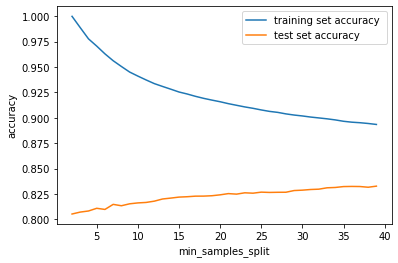

In [68]:
import matplotlib.pyplot as plt

plt.figure()
f_title =list(parameters.keys())[0]
plt.plot(scores["param_" + f_title],scores["mean_train_score"] , label="training set accuracy " )
plt.plot(scores["param_" +f_title ],scores["mean_test_score"] , label="test set accuracy " )

plt.xlabel(f_title)
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [2]:
import pandas as pd 
dt_rf= pd.read_csv('data/tree/credit-card-default.csv')